<a href="https://colab.research.google.com/github/MaraysaVaanessa/Reconhecimento-de-emocoes-/blob/main/Projeto_de_reconhecimento_de_emocoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Reconhecimento de emocoes(teste2)***

In [ ]:
##importando bibliotecas

import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

In [ ]:
##Tensorflow

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
#Criando diretório para montar o Google Drive

!mkdir -p /content/Teste2/gdrive


In [ ]:
from google.colab import drive
import os

# Montar o Google Drive no diretório 'Test'
drive.mount('/content/Teste2/gdrive')


Mounted at /content/Teste2/gdrive


In [ ]:
drive.mount('/content/Teste2/gdrive', force_remount=True)


Mounted at /content/Teste2/gdrive


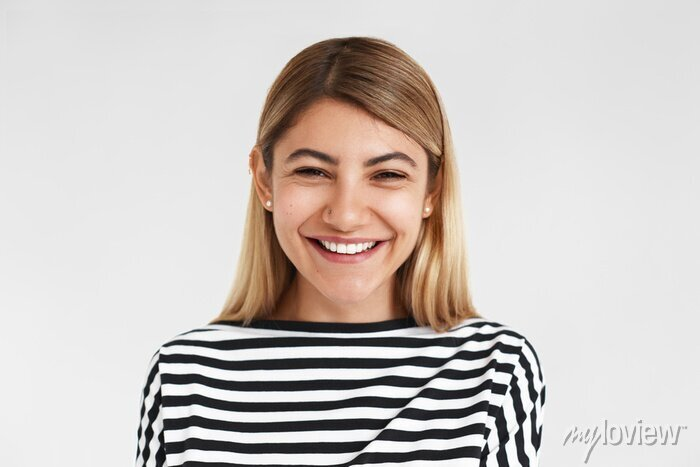

In [ ]:
#Caminho

imagem = cv2.imread("/content/Teste2/gdrive/MyDrive/11.jpg")
cv2_imshow(imagem)

In [ ]:
imagem.shape

(467, 700, 3)

In [ ]:
cascade_faces = "/content/Teste2/gdrive/MyDrive/teste2/haarcascade_frontalface_default.xml"
caminho_modelo = "/content/Teste2/gdrive/MyDrive/teste2/modelo_01_expressoes.h5"
face_detection = cv2.CascadeClassifier(cascade_faces)
classificador_emocoes = load_model(caminho_modelo, compile=False)
expressoes = ("raiva", "nojo", "medo", "feliz", "triste", "surpreso", "neutro")

In [ ]:
import os

# Verifique se o arquivo XML do classificador de faces existe
if os.path.exists(cascade_faces):
    print("O arquivo do classificador de faces existe.")
else:
    print("O arquivo do classificador de faces não foi encontrado.")

O arquivo do classificador de faces existe.


In [ ]:
original = imagem.copy()
face = face_detection.detectMultiScale(original, scaleFactor=1.1, minNeighbors = 3, minSize = (20, 20))

In [ ]:
face

array([[256,  99, 191, 191]], dtype=int32)

In [ ]:
face.shape

(1, 4)

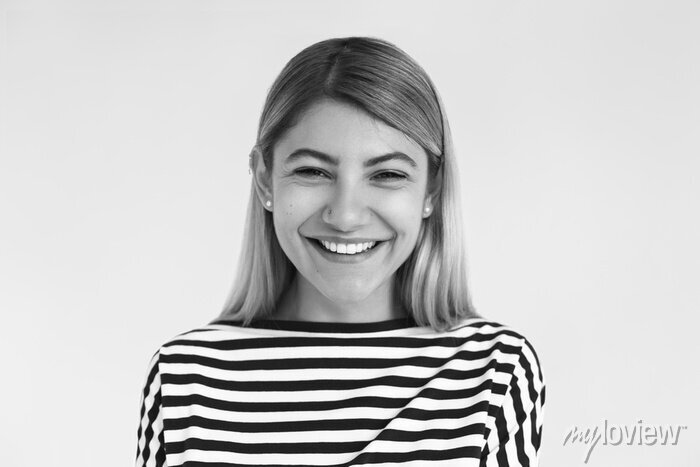

In [ ]:
cinza = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
cv2_imshow(cinza)

In [ ]:
roi = cinza[99:99+191, 256:256+191]

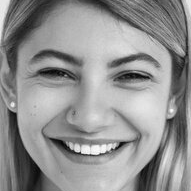

In [ ]:
cv2_imshow(roi)

In [ ]:
roi.shape

(191, 191)

In [ ]:
roi

array([[230, 229, 228, ..., 225, 233, 228],
       [230, 229, 229, ..., 225, 233, 229],
       [229, 229, 229, ..., 227, 231, 230],
       ...,
       [147, 137, 135, ..., 153, 169, 184],
       [150, 140, 134, ..., 152, 167, 174],
       [151, 139, 131, ..., 153, 170, 177]], dtype=uint8)

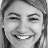

In [ ]:
roi = cv2.resize(roi, (48,48))
cv2_imshow(roi)

In [ ]:
roi.dtype

dtype('uint8')

In [ ]:
roi = roi.astype('float')
roi.dtype

dtype('float64')

In [ ]:
roi

array([[229., 227., 163., ...,  72., 196., 229.],
       [230., 224., 116., ..., 109., 189., 227.],
       [229., 210., 110., ..., 129., 161., 213.],
       ...,
       [138., 133.,  88., ..., 166., 141., 165.],
       [138., 133.,  92., ..., 149., 136., 160.],
       [136., 132.,  89., ..., 134., 134., 160.]])

In [ ]:
roi = roi / 255

In [ ]:
roi

array([[0.89803922, 0.89019608, 0.63921569, ..., 0.28235294, 0.76862745,
        0.89803922],
       [0.90196078, 0.87843137, 0.45490196, ..., 0.42745098, 0.74117647,
        0.89019608],
       [0.89803922, 0.82352941, 0.43137255, ..., 0.50588235, 0.63137255,
        0.83529412],
       ...,
       [0.54117647, 0.52156863, 0.34509804, ..., 0.65098039, 0.55294118,
        0.64705882],
       [0.54117647, 0.52156863, 0.36078431, ..., 0.58431373, 0.53333333,
        0.62745098],
       [0.53333333, 0.51764706, 0.34901961, ..., 0.5254902 , 0.5254902 ,
        0.62745098]])

In [ ]:
roi = img_to_array(roi)

In [ ]:
roi

array([[[0.8980392 ],
        [0.8901961 ],
        [0.6392157 ],
        ...,
        [0.28235295],
        [0.76862746],
        [0.8980392 ]],

       [[0.9019608 ],
        [0.8784314 ],
        [0.45490196],
        ...,
        [0.42745098],
        [0.7411765 ],
        [0.8901961 ]],

       [[0.8980392 ],
        [0.8235294 ],
        [0.43137255],
        ...,
        [0.5058824 ],
        [0.6313726 ],
        [0.8352941 ]],

       ...,

       [[0.5411765 ],
        [0.52156866],
        [0.34509805],
        ...,
        [0.6509804 ],
        [0.5529412 ],
        [0.64705884]],

       [[0.5411765 ],
        [0.52156866],
        [0.36078432],
        ...,
        [0.58431375],
        [0.53333336],
        [0.627451  ]],

       [[0.53333336],
        [0.5176471 ],
        [0.34901962],
        ...,
        [0.5254902 ],
        [0.5254902 ],
        [0.627451  ]]], dtype=float32)

In [ ]:
roi.shape

(48, 48, 1)

In [ ]:
roi = np.expand_dims(roi, axis=0)

In [ ]:
roi.shape

(1, 48, 48, 1)

***Resultado***

In [ ]:
preds = classificador_emocoes.predict(roi)[0]

1/1 [==============================] - 0s 459ms/step


In [ ]:
preds

array([8.0767350e-06, 8.2789442e-10, 6.0622271e-05, 9.9933136e-01,
       8.8370543e-06, 2.9376178e-04, 2.9734534e-04], dtype=float32)

In [ ]:
len(preds)

7

In [ ]:
emotion_probability = np.max(preds)
emotion_probability

0.99933136

In [ ]:
preds.argmax()

3

In [ ]:
label = expressoes[preds.argmax()]
label

'feliz'

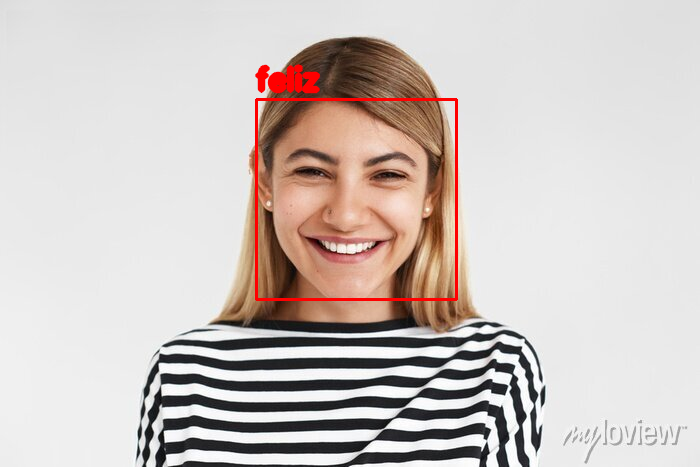

In [ ]:
cv2.putText(original, label, (256,  99- 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 5, cv2.LINE_AA)
cv2.rectangle(original, (256, 99), (256 + 200, 99 + 200), (0, 0, 255), 2)
cv2_imshow(original)


In [ ]:
##vizualizacao futura

probabilidades = np.ones((250, 300, 3), dtype=np.uint8) * 255
probabilidades

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
probabilidades.shape

(250, 300, 3)

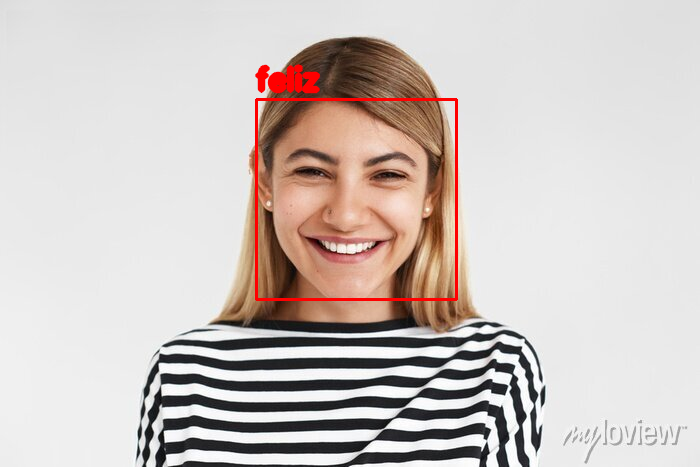

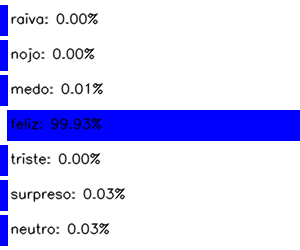

In [ ]:
cv2_imshow(original)

if len(face) == 1:
    for i, (emotion, prob) in enumerate(zip(expressoes, preds)):
        text = "{}: {:.2f}%".format(emotion, prob * 100)
        w = int(prob * 300)

        # barra de emoção abaixo da imagem
        cv2.rectangle(probabilidades, (7, i * 35 + 5), (w, i * 35 + 35), (255, 0, 0), -1)
        cv2.putText(probabilidades, text, (10, i * 35 + 23), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)

    cv2_imshow(probabilidades)


# TESTANDO COM VARIOS ROSTOS

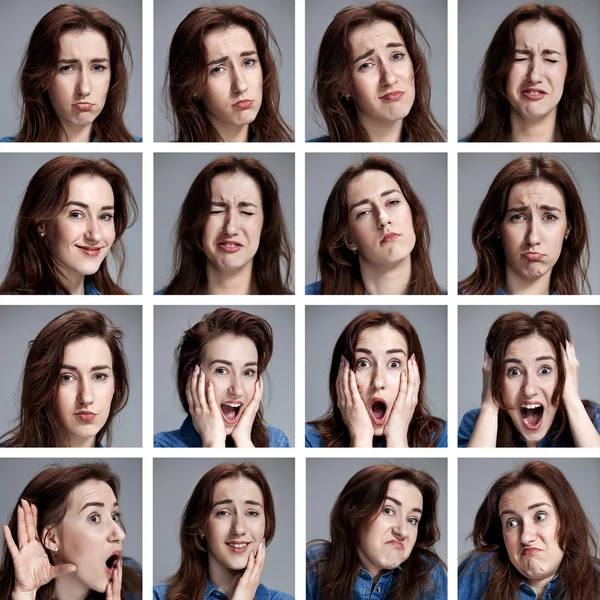

In [ ]:
# Carregando uma nova imagem
nova_imagem = cv2.imread("/content/Teste2/gdrive/MyDrive/teste2/fotos/4.jpg")
cv2_imshow(nova_imagem)


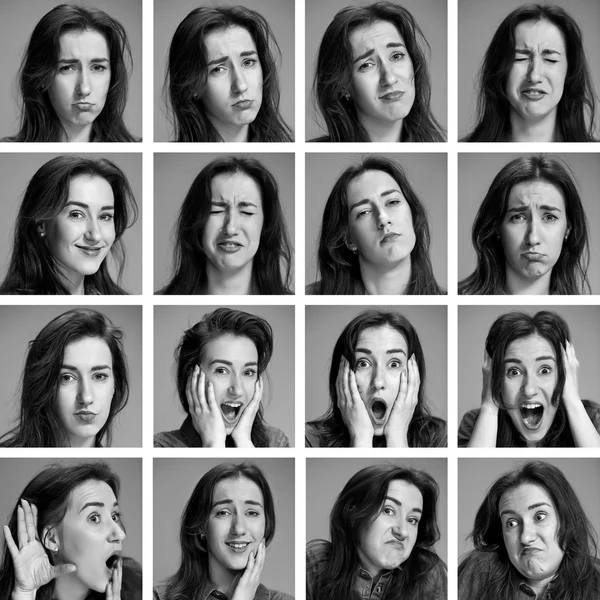

In [ ]:
# Verificando se a leitura da nova imagem foi bem-sucedida
if nova_imagem is None:
    print("Não foi possível ler a nova imagem.")
else:
    # Converta a nova imagem para tons de cinza
    nova_imagem_em_tons_de_cinza = cv2.cvtColor(nova_imagem, cv2.COLOR_BGR2GRAY)

    # Exibindo a nova imagem em tons de cinza
    cv2_imshow(nova_imagem_em_tons_de_cinza)


In [ ]:
cascade_faces = "/content/Teste2/gdrive/MyDrive/teste2/haarcascade_frontalface_default.xml"
caminho_modelo = "/content/Teste2/gdrive/MyDrive/teste2/modelo_01_expressoes.h5"
face_detection = cv2.CascadeClassifier(cascade_faces)
classificador_emocoes = load_model(caminho_modelo, compile=False)
expressoes = ("raiva", "nojo", "medo", "feliz", "triste", "surpreso", "neutro")


In [ ]:
face = face_detection.detectMultiScale(nova_imagem_em_tons_de_cinza, scaleFactor=1.1, minNeighbors=1, minSize=(20, 20))


In [ ]:
face

array([[496,  26,  82,  82],
       [ 43,  37,  80,  80],
       [190,  31,  88,  88],
       [337,  23,  94,  94],
       [191, 177,  83,  83],
       [337, 172,  86,  86],
       [ 50, 183,  83,  83],
       [491, 182,  87,  87],
       [337, 330,  86,  86],
       [488, 337,  85,  85],
       [193, 340,  82,  82],
       [ 43, 344,  84,  84],
       [199, 481,  79,  79],
       [486, 486,  82,  82],
       [ 56, 476, 110, 110],
       [365, 489,  69,  69]], dtype=int32)

In [ ]:
face.shape

(16, 4)

In [ ]:
len(face)

16

In [ ]:
cinza.shape

(467, 700)

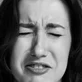

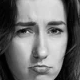

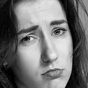

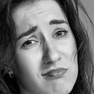

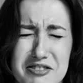

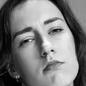

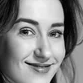

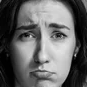

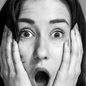

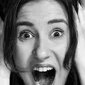

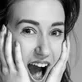

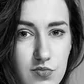

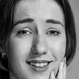

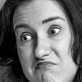

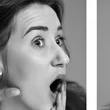

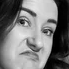

In [ ]:
for (x, y, w, h) in face:
    roi = nova_imagem_em_tons_de_cinza[y:y + h, x:x + w]
    cv2_imshow(roi)

In [ ]:
for (x, y, w, h) in face:
    roi = nova_imagem_em_tons_de_cinza[y:y + h, x:x + w]
    roi = cv2.resize(roi, (48, 48))
    roi = roi.astype("float") / 255
    roi = img_to_array(roi)
    roi = np.expand_dims(roi, axis=0)
    preds = classificador_emocoes.predict(roi)[0]

1/1 [==============================] - 0s 41ms/step


In [ ]:
 print("Previsões:", preds)

Previsões: [0.28220612 0.03960956 0.20768689 0.13520546 0.16661608 0.04924024
 0.11943557]


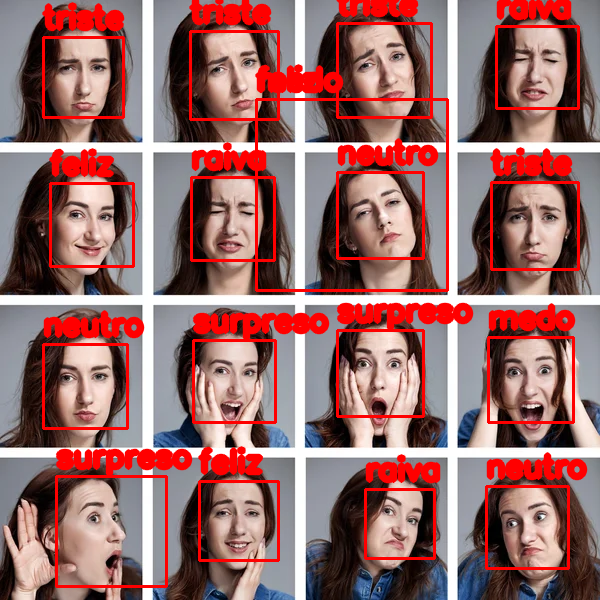

In [ ]:
cv2_imshow(nova_imagem)